Import data set

In [56]:
#Import necessary library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("default")
sns.set(font_scale=1.1)


In [57]:
# import data set
df = pd.read_csv("heart.csv")
df.head(10)


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0
7,54,M,ATA,110,208,0,Normal,142,N,0.0,Up,0
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
9,48,F,ATA,120,284,0,Normal,120,N,0.0,Up,0


In [58]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [59]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
HeartDisease,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


In [60]:
#define targeted and features types

target_col = "HeartDisease"

numeric_cols =["Age","RestingBP","Cholesterol","FastingBS","MaxHR","Oldpeak"]

categorical_col =["Sex","ChestPainType","RestingECG","ExerciseAngina","ST_Slope"]

print(target_col)
print(numeric_cols)
print(categorical_col)

HeartDisease
['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak']
['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']


##Start down EDA

In [61]:
# Check missing values count per column
df.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [62]:
# Look at some basic value ranges
df[numeric_cols].agg(["min", "max", "mean","median"]).T

,min,max,mean,median
Age,28.0,77.0,53.510893,54.0
RestingBP,0.0,200.0,132.396514,130.0
Cholesterol,0.0,603.0,198.799564,223.0
FastingBS,0.0,1.0,0.233115,0.0
MaxHR,60.0,202.0,136.809368,138.0
Oldpeak,-2.6,6.2,0.887364,0.6


In [63]:
# check unique value

#df.loc[df['Sex']=='F','Sex']='f'
for c in categorical_col:
    print(c,df[c].unique())

Sex ['M' 'F']
ChestPainType ['ATA' 'NAP' 'ASY' 'TA']
RestingECG ['Normal' 'ST' 'LVH']
ExerciseAngina ['N' 'Y']
ST_Slope ['Up' 'Flat' 'Down']


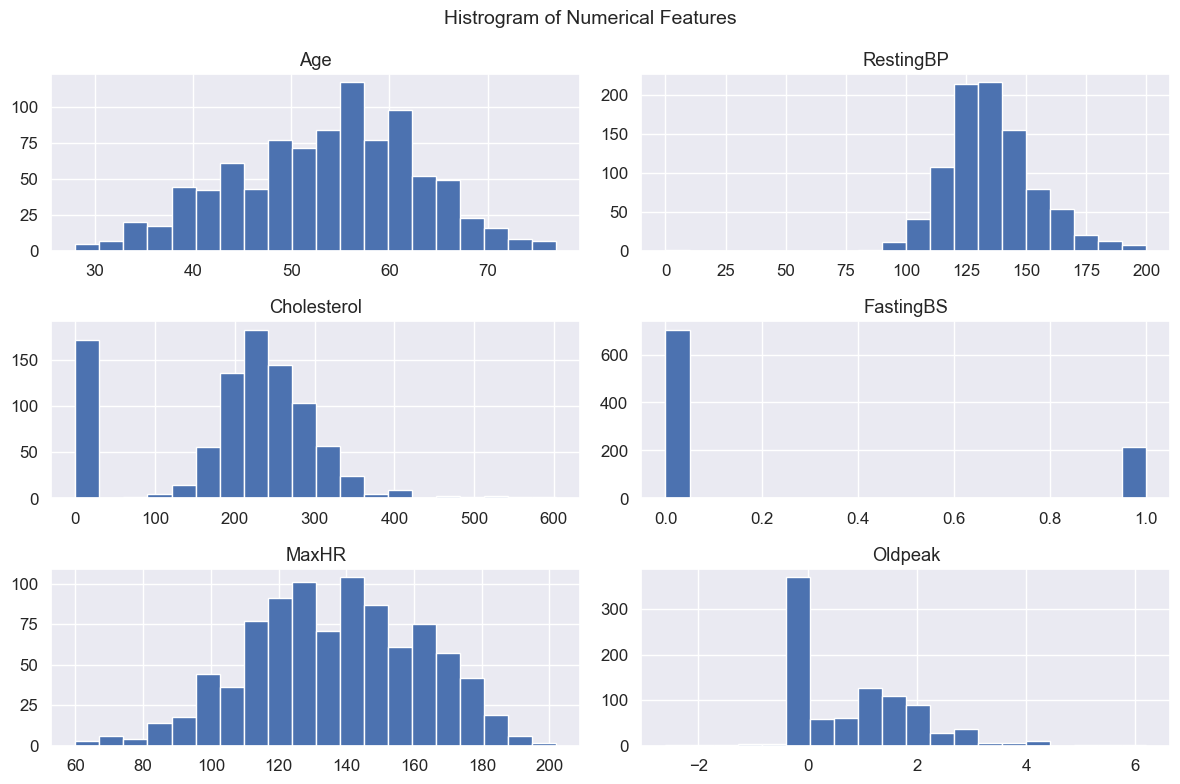

In [64]:
# histogram representaion for visualization
df[numeric_cols].hist(bins=20,figsize=(12,8))
plt.suptitle("Histrogram of Numerical Features",fontsize=14)
plt.tight_layout()
plt.show()

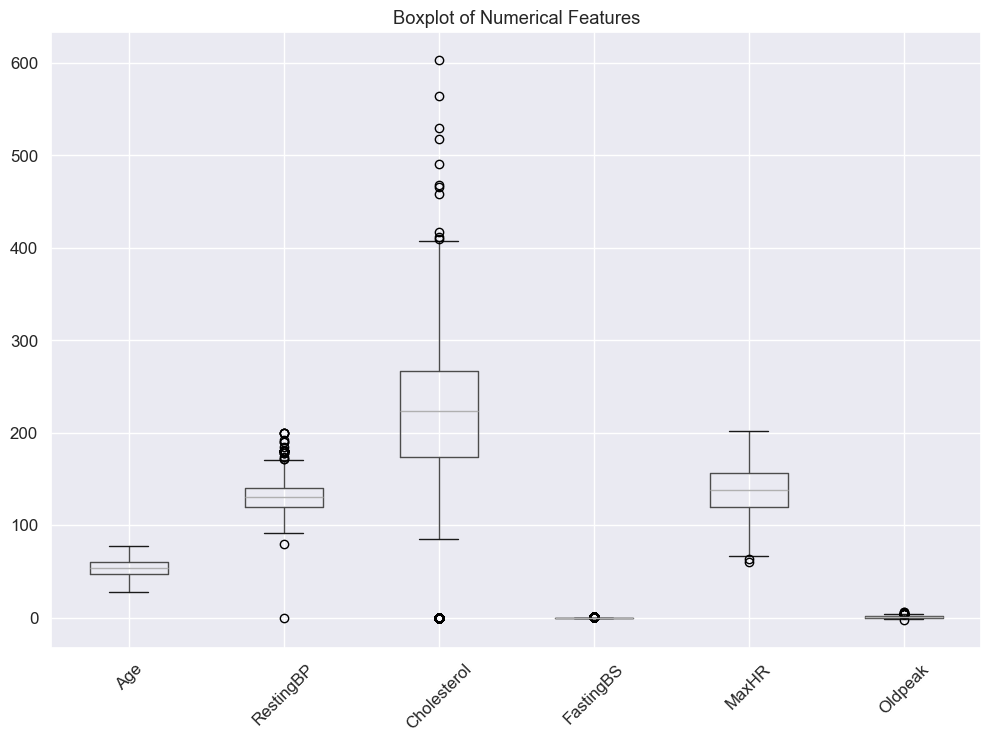

In [65]:
# Boxplots to get a sense of spread and possible outliers
plt.figure(figsize=(12,8))
df[numeric_cols].boxplot()
plt.title("Boxplot of Numerical Features")
plt.xticks(rotation=45)
plt.show()

## 5. Target Distribution and Class Imbalance

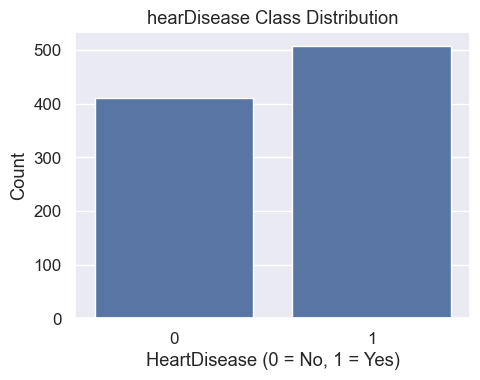

In [66]:
#Target Distribution and Class Imbalance
plt.figure(figsize=(5,4))
sns.countplot(x=df[target_col])
plt.title("hearDisease Class Distribution")
plt.xlabel("HeartDisease (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

In [67]:
df[target_col].value_counts(normalize=True)

HeartDisease
1    0.553377
0    0.446623
Name: proportion, dtype: float64

6. Categorical Feature Exploration

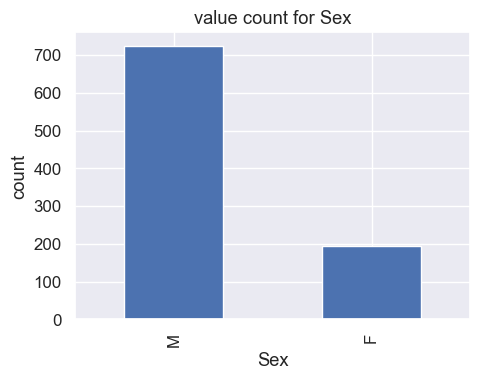

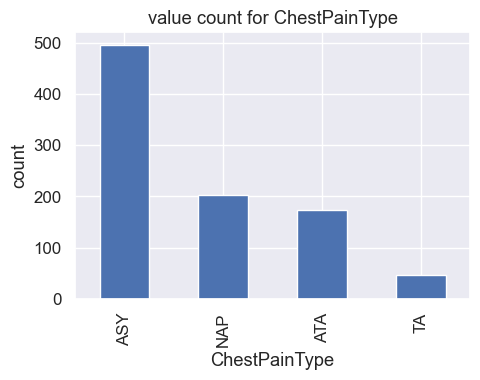

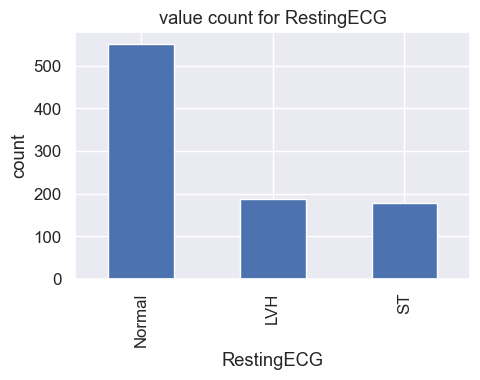

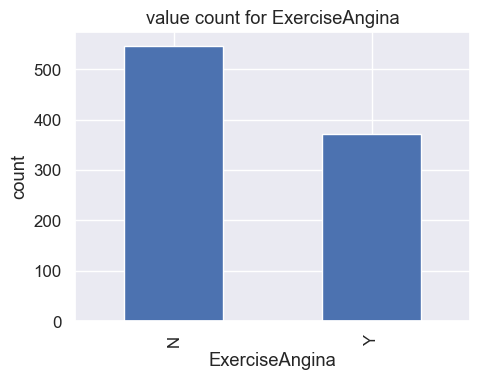

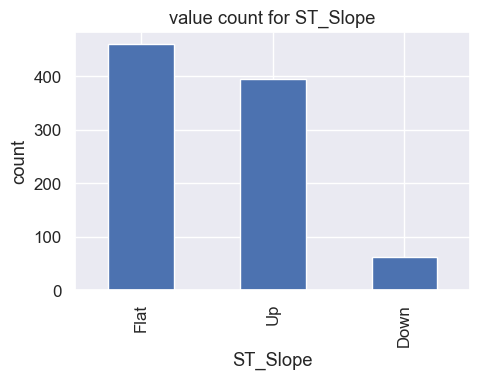

In [68]:
for c in categorical_col:
    plt.figure(figsize=(5,4))
    df[c].value_counts().plot(kind='bar')
    plt.title(f"value count for {c}")
    plt.ylabel("count")
    plt.tight_layout()
    plt.show()

## 7. Relationships Between Features and Target

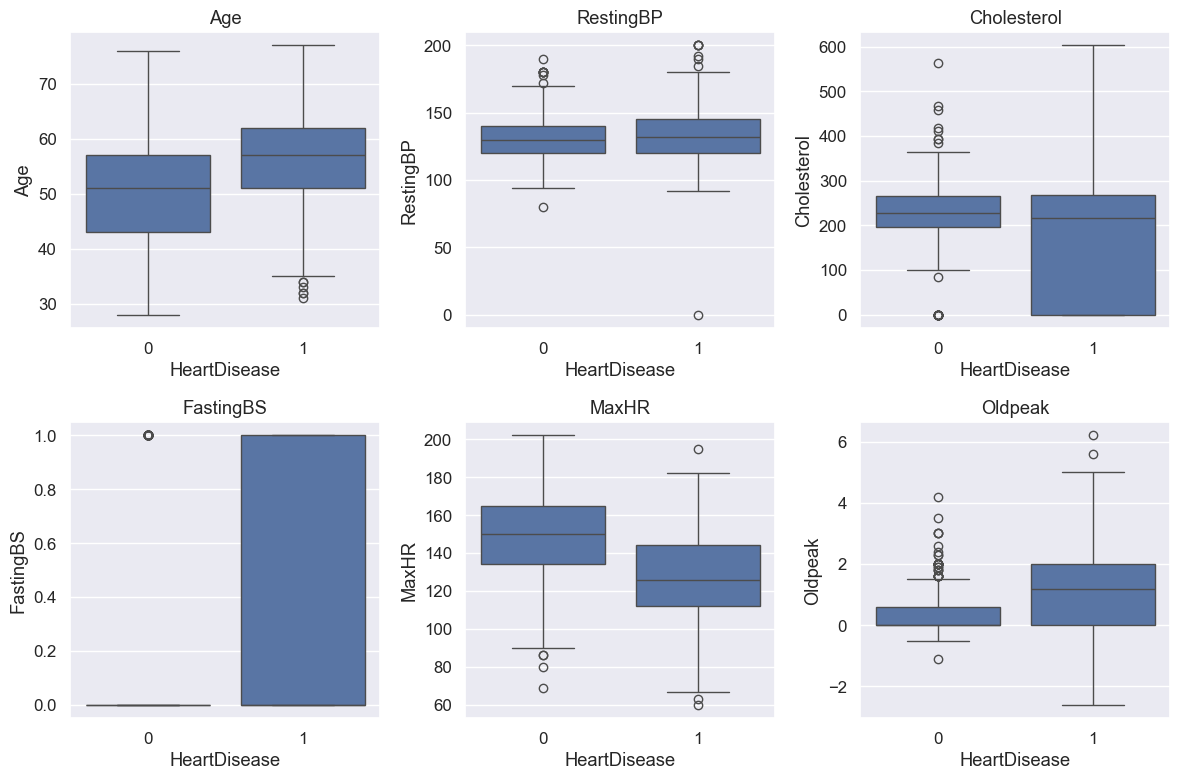

In [ ]:
# Boxplots of numeric features split by HeartDisease
plt.figure(figsize=(12,8))
for i, col in enumerate(numeric_cols,1):
  plt.subplot(2,3,i)
  sns.boxplot(x=df[target_col], y = df[col])
  plt.title(col)
plt.tight_layout()
plt.show()

### 7.1 Pairplot for a Subset of Features

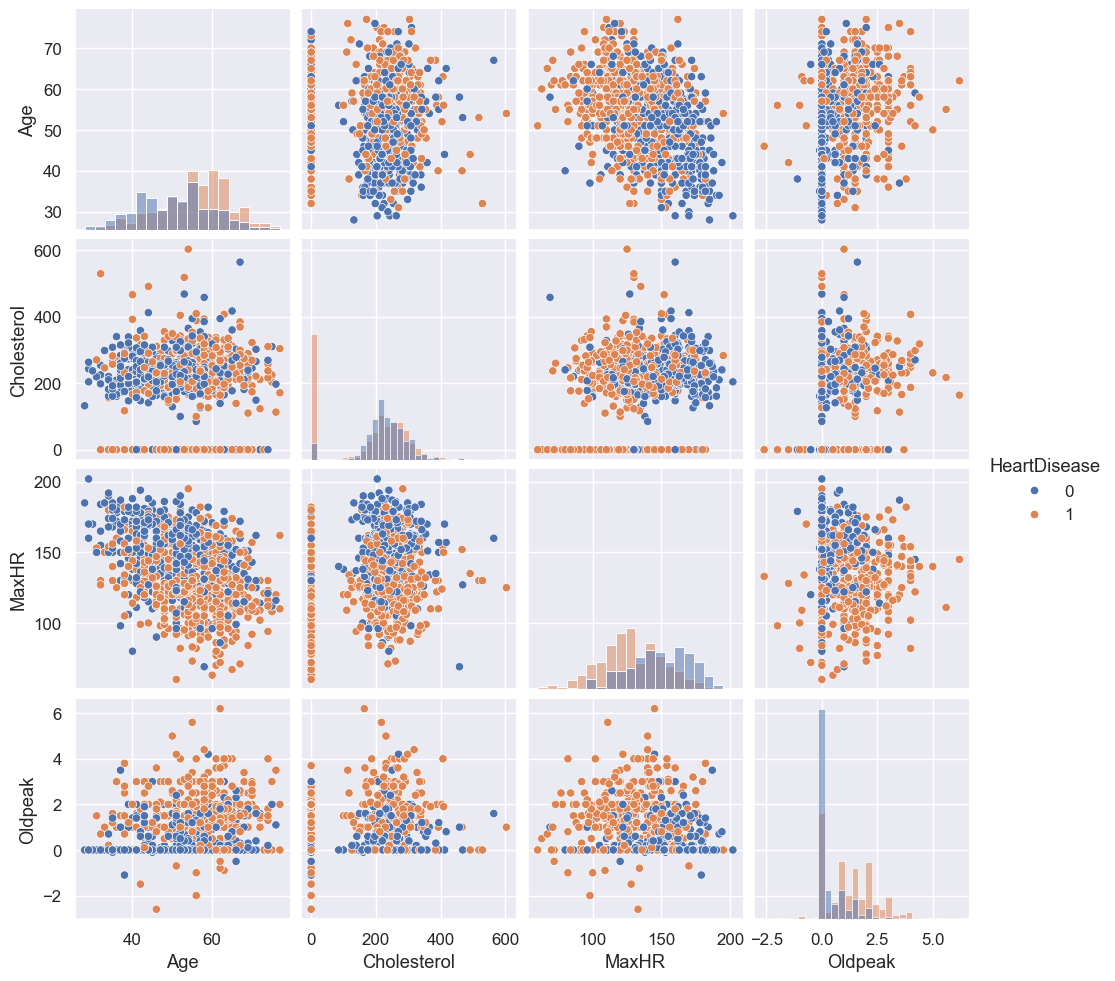

In [78]:
#Pairplot for a Subset of Features
sns.pairplot(df[["Age","Cholesterol","MaxHR", "Oldpeak", "HeartDisease"]],hue="HeartDisease", diag_kind="hist")
plt.show()

### Correlation Matrix and Heatmap

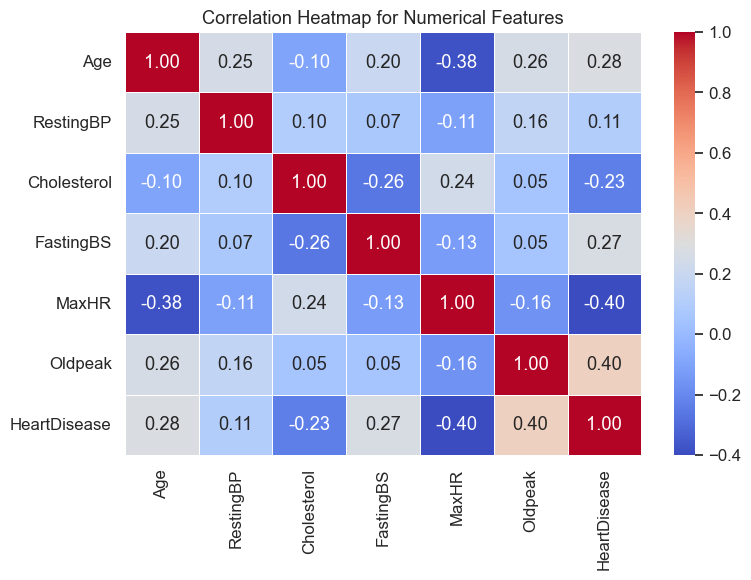

In [79]:
corr_matrix = df[numeric_cols + [target_col]].corr()
plt.figure(figsize=(8,6))

sns.heatmap(corr_matrix, annot=True, cmap="coolwarm",fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap for Numerical Features")
plt.tight_layout()
plt.show()

### Categorical Features vs Target


Proportion (%) of HeartDisease within Sex


HeartDisease,0,1
Sex,,
F,74.0,26.0
M,37.0,63.0


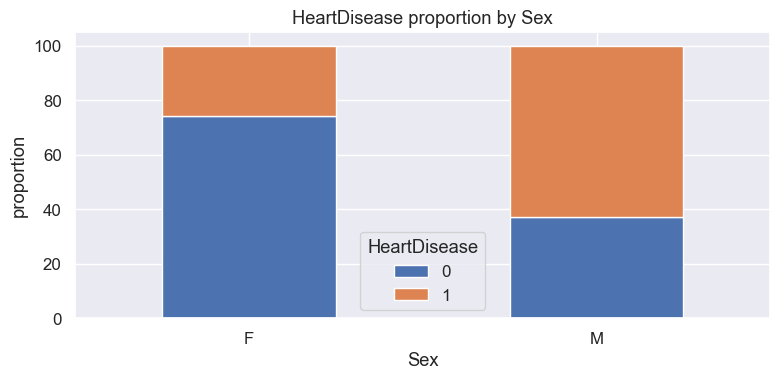


Proportion (%) of HeartDisease within ChestPainType


HeartDisease,0,1
ChestPainType,,
ASY,21.0,79.0
ATA,86.0,14.0
NAP,65.0,35.0
TA,57.0,43.0


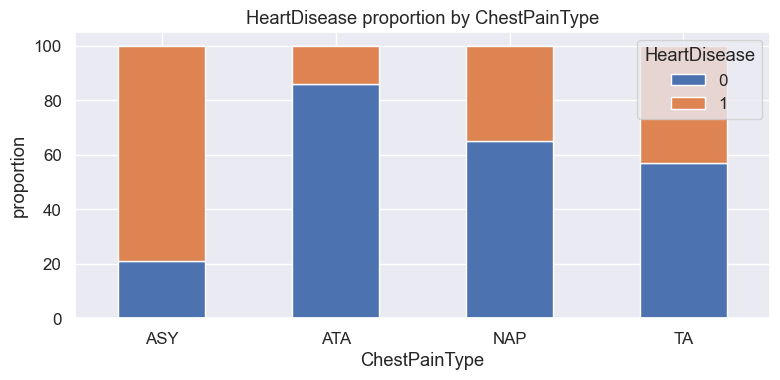


Proportion (%) of HeartDisease within RestingECG


HeartDisease,0,1
RestingECG,,
LVH,44.0,56.0
Normal,48.0,52.0
ST,34.0,66.0


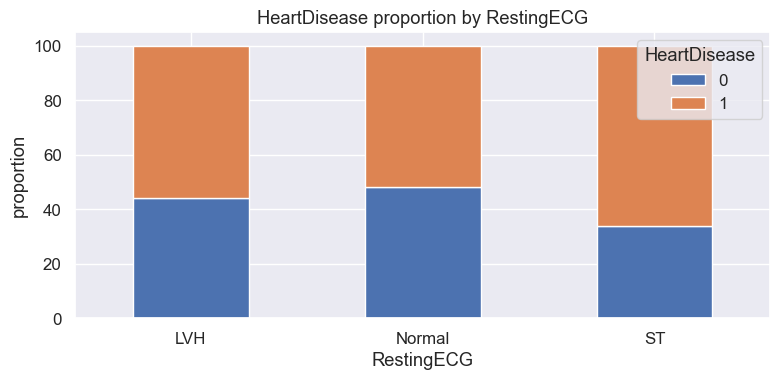


Proportion (%) of HeartDisease within ExerciseAngina


HeartDisease,0,1
ExerciseAngina,,
N,65.0,35.0
Y,15.0,85.0


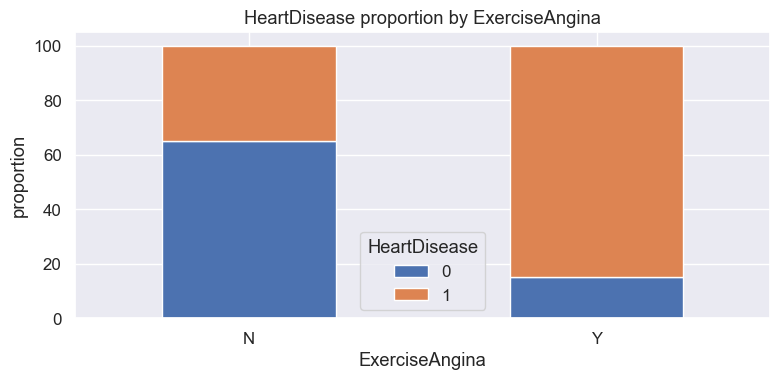


Proportion (%) of HeartDisease within ST_Slope


HeartDisease,0,1
ST_Slope,,
Down,22.0,78.0
Flat,17.0,83.0
Up,80.0,20.0


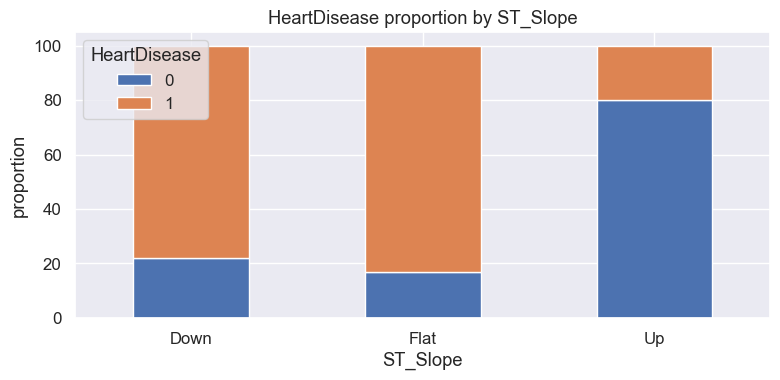

In [88]:
#Categorical Features vs Target

  
for c in catagorical_col:
    ct = pd.crosstab(df[c],df[target_col],normalize="index")
    ct=ct.round(2)*100
    print(f"\nProportion (%) of {target_col} within {c}")
    display(ct)
    
    ct.plot(kind="bar", stacked=True, figsize=(8,4))
    plt.title(f"HeartDisease proportion by {c}")
    plt.ylabel("proportion")
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()